<a href="https://colab.research.google.com/github/gabrielrsh/Analise_de_Dados_Python_Pandas/blob/main/analise_eploratoria_vendas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [ ]:
# Criando DataFrame
df = pd.read_excel("datasets/AdventureWorks.xlsx")

In [ ]:
# Visualizar as 5 primeiras linhas
df.head()

In [ ]:
# Quantidade de linhas e colunas
df.shape

In [ ]:
# Verificando os tipos de Dados
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

In [ ]:
# Qual a receita total?
df["Valor Venda"].sum()

5984606.1426

In [ ]:
# Qual é o custo total?
df["Custo"] = df['Custo Unitário'].mul(df['Quantidade'])

In [ ]:
df.head(1)

In [ ]:
# Qual é o custo total?
round(df['Custo'].sum(),2)

2486783.05

In [ ]:
# Tendo a receita total e o custo total podemos encontrar o lucro
df['Lucro'] = df['Valor Venda'] - df['Custo']

In [ ]:
df.head(1)

In [ ]:
# Lucro total?
round(df['Lucro'].sum(), 2)

3497823.09

In [ ]:
# Criando coluna para armazenar o total de dias para a entrega
df["Tempo Envio"] = df['Data Envio'] - df['Data Venda']

In [ ]:
df.head(1)

**Qual foi a média do tempo de envio para cada Marca?**

In [ ]:
# Transfomando a coluna Tempo envio em numérica
df['Tempo Envio'] = (df['Data Envio'] - df['Data Venda']).dt.days

In [ ]:
df.head(1)

In [ ]:
# Conferindo o tipo de dado da coluna Tempo Envio
df['Tempo Envio'].dtypes

In [ ]:
# Média do tempo de envio por Marca
df.groupby("Marca")["Tempo Envio"].mean()

**Analisar se existem valores ausentes na base de dados**

In [ ]:
df.isnull().sum()

**Qual foi o lucro por ano e por marca?**

In [ ]:
# Alterar a visualização dos números (para nao exibir como notação cientifica)
pd.options.display.float_format = '{:20,.2f}'.format

In [ ]:
# Agrupando por ano e marca
df.groupby([df['Data Venda'].dt.year, "Marca"])["Lucro"].sum()

In [ ]:
# Resetando Index para gerar um novo DataFrame
lucro_ano = df.groupby([df['Data Venda'].dt.year, "Marca"])["Lucro"].sum().reset_index()
lucro_ano

In [ ]:
# Qual o total de produtos vendidos?
df.groupby("Produto")['Quantidade'].sum().sort_values(ascending=False)

In [ ]:
# Gráfico com o total de produtos vendidos
df.groupby('Produto')['Quantidade'].sum().sort_values().plot.barh(title="Total Produtos Vendidos")
plt.xlabel('Total')
plt.ylabel('Produto');

In [ ]:
# Gráfico com o lucro por ano
df.groupby(df['Data Venda'].dt.year)['Lucro'].sum().plot.bar(title='Lucro x Ano')
plt.xlabel('Ano')
plt.ylabel('Lucro');

In [ ]:
df.groupby(df['Data Venda'].dt.year)['Lucro'].sum()

In [ ]:
# Selecionando apenas as vendas de 2009
df_2009 = df[df['Data Venda'].dt.year == 2009]
df_2009.head()

In [ ]:
# Gráfico do lucro por mês do ano de 2009
df_2009.groupby(df_2009['Data Venda'].dt.month)['Lucro'].sum().plot(title='Lucro x Mês')
plt.xlabel('Mês')
plt.ylabel('Lucro');

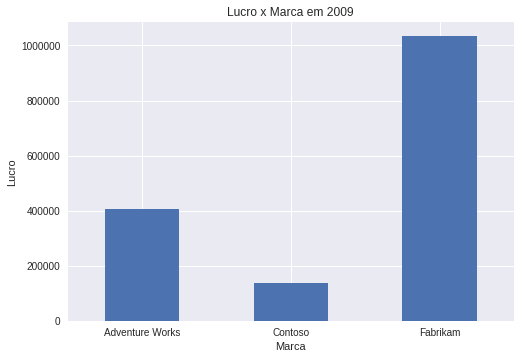

In [ ]:
# Gráfico do lucro por Marca no ano de 2009
df_2009.groupby('Marca')['Lucro'].sum().plot.bar(title='Lucro x Marca em 2009')
plt.xlabel('Marca')
plt.ylabel('Lucro')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation='horizontal');

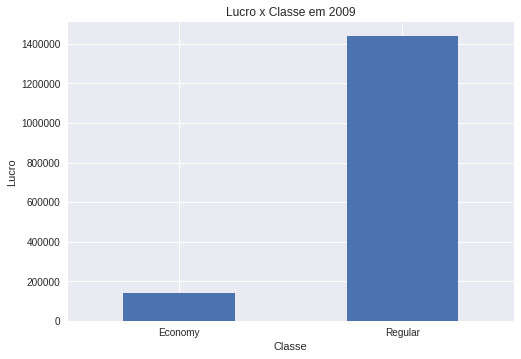

In [ ]:
# Gráfico do lucro por Classe no ano de 2009
df_2009.groupby('Classe')['Lucro'].sum().plot.bar(title='Lucro x Classe em 2009')
plt.xlabel('Classe')
plt.ylabel('Lucro')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation='horizontal');

In [ ]:
# Análises estatísticas do Tempo de Envio
df['Tempo Envio'].describe()

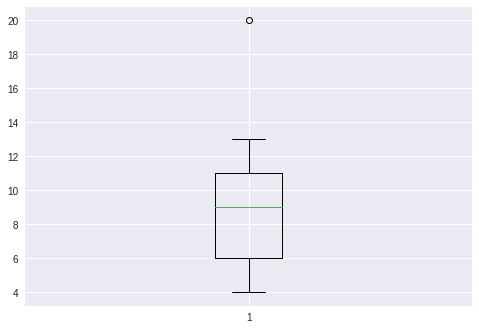

In [ ]:
# Gráfico de Boxplot do tempo de envio
plt.boxplot(df['Tempo Envio']);

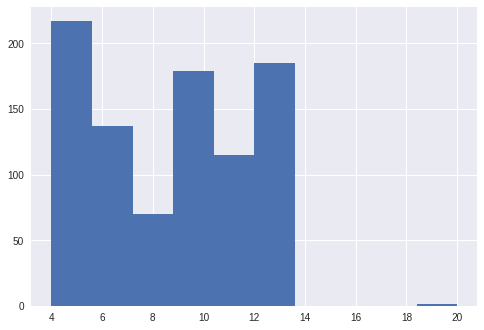

In [ ]:
# Histograma do tempo de envio
plt.hist(df['Tempo Envio']);

In [ ]:
# Tempo mínimo de envio
print(f"Tempo mínimo de envio {df['Tempo Envio'].min()} dias")

# Tempo máximo de envio
print(f"Tempo máximo de envio {df['Tempo Envio'].max()} dias")

Tempo mínimo de envio 4 dias
Tempo máximo de envio 20 dias


In [ ]:
# Identificando o Outlier
df[df['Tempo Envio'] == 20]

In [ ]:
# Salvando em um arquivo csv
df.to_csv("df_vendas_novo.csv", index=False)